# 1. Principal Component Analysis

<img src="https://github.com/image-assets/png/blob/master/pca1.png?raw=true" width="800" />

<img src="https://github.com/image-assets/png/blob/master/pca2.png?raw=true" width="800" />

# 2. Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pca = pd.read_csv('./pca.csv')

In [3]:
df_pca.head()

,PC1,PC2,PC3,PC4,label
0,3.484325,1.008981,-1.454038,0.002350,1
1,3.614973,-0.933819,-0.573790,0.195290,1
2,3.624431,-0.747450,0.454131,0.149282,1
3,3.565400,-1.039998,-0.526947,0.212218,1
4,3.597683,-1.591979,-1.525019,0.316359,0


In [4]:
df_pca.shape

(1128, 5)

In [5]:
selected_features = ['PC1', 'PC2', 'PC3', 'PC4']

In [6]:
x = df_pca[selected_features].copy()
y = df_pca['label'].copy()

In [7]:
del df_pca

In [8]:
x.head()

,PC1,PC2,PC3,PC4
0,3.484325,1.008981,-1.454038,0.002350
1,3.614973,-0.933819,-0.573790,0.195290
2,3.624431,-0.747450,0.454131,0.149282
3,3.565400,-1.039998,-0.526947,0.212218
4,3.597683,-1.591979,-1.525019,0.316359


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

# 3. Preprocessing

In [10]:
from sklearn import preprocessing

In [11]:
scaler_x = preprocessing.MinMaxScaler(feature_range=(-1, 1))
x = np.array(x).reshape((len(x), len(selected_features)))
x = scaler_x.fit_transform(x)

In [12]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
y = np.array(y).reshape(len(y), 1)
y = scaler_y.fit_transform(y)

In [13]:
x[0]

array([ 0.94984145,  0.03783052, -0.58900141, -0.52573679])

# 4. Train and Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Split data into training and testing sets.
# Validating data will be created during training.
test_size=0.20

(x_train, x_test) = train_test_split(x, 
                                               test_size = test_size, 
                                               random_state = 2)

(y_train, y_test) = train_test_split(y, 
                                     test_size=test_size, 
                                     random_state=2)

In [16]:
x_train

array([[ 0.31477467, -0.43136272, -0.42453823, -0.66572334],
       [ 0.32903807,  0.29677682, -0.30686162, -0.72640168],
       [-0.45752879, -0.77621876, -0.22062689, -0.68563825],
       ...,
       [ 0.43940984, -0.0477003 , -0.36103228, -0.71400006],
       [ 0.35729036, -0.70502165, -0.32187194, -0.65218168],
       [ 0.17855162, -0.42092485, -0.26071402, -0.69566405]])

In [17]:
x_train.shape

(902, 4)

In [18]:
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

### Write train and test datasets as csv

In [19]:
import csv

In [20]:
def write_numpy_as_csv(filename, arr, columns):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC)
        writer.writerow(columns)
        writer.writerows(arr.tolist())

In [21]:
write_numpy_as_csv('./train_and_test/x_train.csv', x_train, selected_features)
write_numpy_as_csv('./train_and_test/x_test.csv', x_test, selected_features)
write_numpy_as_csv('./train_and_test/y_train.csv', y_train, ['movement'])
write_numpy_as_csv('./train_and_test/y_test.csv', y_test, ['movement'])

# 5. Sentiment-LSTM Model

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

Using TensorFlow backend.


In [23]:
batch_size = 32
nb_epoch = 100
neurons = 25
dropout_ratio = 0.1

In [24]:
model = Sequential() 
model.add(LSTM(neurons, 
               return_sequences=True, 
               activation='tanh', 
               inner_activation='hard_sigmoid', 
               input_shape=(len(selected_features), 1)
              )
         )

C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(4, 1), recurrent_activation="hard_sigmoid")`
  


In [25]:
model.add(Dropout(dropout_ratio))
model.add(LSTM(neurons,
              return_sequences=True,
              activation='tanh'
              )
         )
model.add(Dropout(dropout_ratio))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout_ratio))
model.add(Dense(activity_regularizer=regularizers.l1(0.00001), 
                output_dim=1, 
                activation='linear'
               )
         )
model.add(Activation('tanh'))

C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
  if sys.path[0] == '':


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 25)             2700      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 25)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 25)             5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [27]:
from keras.callbacks import Callback, EarlyStopping
from keras.utils import plot_model

In [28]:
model.compile(loss='mean_squared_error' , optimizer='RMSprop',  metrics=['accuracy'])

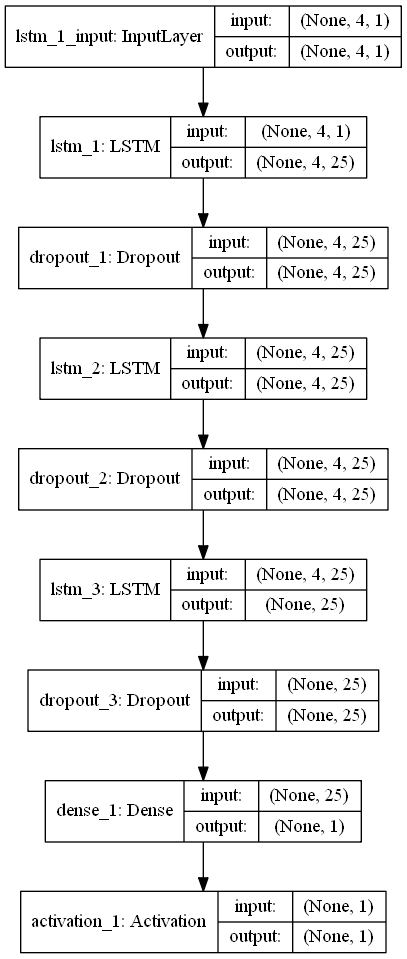

In [29]:
plot_model(model, show_shapes=True, to_file='model.png')

In [30]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)

In [31]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[es_callback],
                    shuffle=True)

C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 721 samples, validate on 181 samples
Epoch 1/100
721/721 [==============================] - 2s 2ms/step - loss: 0.3709 - accuracy: 0.4508 - val_loss: 0.2501 - val_accuracy: 0.5470
Epoch 2/100
721/721 [==============================] - 0s 670us/step - loss: 0.2513 - accuracy: 0.5076 - val_loss: 0.2583 - val_accuracy: 0.4696
Epoch 3/100
721/721 [==============================] - 0s 628us/step - loss: 0.2503 - accuracy: 0.5368 - val_loss: 0.2535 - val_accuracy: 0.4641
Epoch 4/100
721/721 [==============================] - 0s 616us/step - loss: 0.2509 - accuracy: 0.5312 - val_loss: 0.2488 - val_accuracy: 0.5691
Epoch 5/100
721/721 [==============================] - 0s 613us/step - loss: 0.2532 - accuracy: 0.5090 - val_loss: 0.2577 - val_accuracy: 0.4696
Epoch 6/100
721/721 [==============================] - 0s 625us/step - loss: 0.2508 - accuracy: 0.5298 - val_loss: 0.2616 - val_accuracy: 0.4696
Epoch 7/100
721/721 [==============================] - 0s 618us/step - loss: 0.2482 - 

# 6. Model Evaluation

In [32]:
import matplotlib.pyplot as plt
# Plot data to see relationship in training and validation data
def plot_accuracy(hist):
    epoch_list=list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, 3, 4, ..., # of epochs]
    plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
    plt.legend(('Training Accuracy', 'Validation Accuracy'))
    plt.show()
    return 0


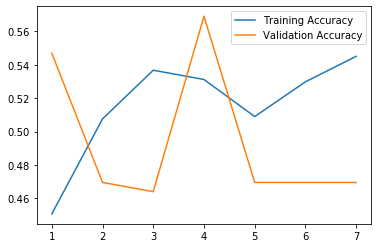

0

In [33]:
plot_accuracy(history)

In [34]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

226/226 [==============================] - 0s 282us/step
Test score: 0.23689636904581457
Test accuracy: 0.6150442361831665


In [35]:
## Import library to check other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
predictions = model.predict(x_test)

In [37]:
matrix = confusion_matrix(y_test, predictions.round())
print('confusion_matrix')
print(matrix)

confusion_matrix
[[  0  87]
 [  0 139]]


In [38]:
report = classification_report(y_test, predictions.round())
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        87
         1.0       0.62      1.00      0.76       139

    accuracy                           0.62       226
   macro avg       0.31      0.50      0.38       226
weighted avg       0.38      0.62      0.47       226



C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Save the model

In [39]:
model.save('sentiment-lstm.h5')